In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df_2016= pd.read_csv(r'C:\Users\LENOVO\Desktop\programacion\buques\data\buques-pasajeros-2016.csv',encoding='latin-1')

df_2016



,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio
0,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506,COLONIA EXPRESS BAIRES,248,16,3,Salida,Pasajeros,2016
1,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506,ROU - COLONIA,76,27,0,Entrada,Pasajeros,2016
2,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506,COLONIA EXPRESS BAIRES,83,16,0,Salida,Pasajeros,2016
3,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506,ROU - COLONIA,268,14,10,Entrada,Pasajeros,2016
4,2016-01-26 00:00:00,ATLANTIC III,9001540,BUQUEBUS,316,33,2,Salida,Pasajeros,2016
...,...,...,...,...,...,...,...,...,...,...
9085,2016-12-31 00:00:00,MACAW ARROW,9566617,PUERTO BUENOS AIRES,0,22,0,Entrada,Carga,2016
9086,2016-12-31 00:00:00,SILVIA ANA L,9119385,BUQUEBUS,994,49,7,Salida,Pasajeros,2016
9087,2016-12-31 00:00:00,SILVIA ANA L,9119385,ROU - COLONIA,146,48,0,Entrada,Pasajeros,2016
9088,2016-12-31 00:00:00,SILVIA ANA L,9119385,BUQUEBUS,458,49,5,Salida,Pasajeros,2016


In [123]:
df_2017 = pd.read_csv(r'data\buques-pasajeros-2017.csv',encoding='latin-1')

df_2017

,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio
0,2017-01-01 00:00:00,ATLANTIC EXPRESS,8919506,COLONIA EXPRESS BAIRES,434,16,9,Salida,Pasajeros,2017
1,2017-01-01 00:00:00,ATLANTIC EXPRESS,8919506,ROU - COLONIA,347,1,7,Entrada,Pasajeros,2017
2,2017-01-01 00:00:00,ATLANTIC EXPRESS,8919506,COLONIA EXPRESS BAIRES,328,15,10,Salida,Pasajeros,2017
3,2017-01-01 00:00:00,ATLANTIC III,9001540,BUQUEBUS,407,32,8,Salida,Pasajeros,2017
4,2017-01-01 00:00:00,ELADIA ISABEL,8869581,BUQUEBUS,340,35,4,Salida,Pasajeros,2017
...,...,...,...,...,...,...,...,...,...,...
8917,2017-12-31 00:00:00,JUAN PATRICIO,9610028,ROU - COLONIA,185,24,5,Entrada,Pasajeros,2017
8918,2017-12-31 00:00:00,SILVIA ANA L,9119385,ROU - COLONIA,531,40,3,Entrada,Pasajeros,2017
8919,2017-12-31 00:00:00,SILVIA ANA L,9119385,BUQUEBUS,677,43,3,Salida,Pasajeros,2017
8920,2017-12-31 00:00:00,SILVIA ANA L,9119385,ROU - COLONIA,206,43,0,Entrada,Pasajeros,2017


In [124]:
df_2018 = pd.read_csv(r'data\buques-pasajeros-2018.csv',encoding='latin-1')
df_2018

,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio
0,2018-01-01 00:00:00,ATLANTIC EXPRESS,8919506,COLONIA EXPRESS BAIRES,365,14,10,Salida,Pasajeros,2018
1,2018-01-01 00:00:00,ATLANTIC EXPRESS,8919506,ROU - COLONIA,515,14,17,Entrada,Pasajeros,2018
2,2018-01-01 00:00:00,ATLANTIC EXPRESS,8919506,COLONIA EXPRESS BAIRES,308,15,5,Salida,Pasajeros,2018
3,2018-01-01 00:00:00,ATLANTIC EXPRESS,8919506,ROU - COLONIA,554,16,9,Entrada,Pasajeros,2018
4,2018-01-01 00:00:00,ATLANTIC III,9001540,BUQUEBUS,148,30,3,Salida,Pasajeros,2018
...,...,...,...,...,...,...,...,...,...,...
8789,2018-12-31 00:00:00,NaN,9119385,BUQUEBUS,677,47,8,Salida,Pasajeros,2018
8790,2018-12-31 00:00:00,NaN,4224,PUERTO BUENOS AIRES,0,9,0,Salida,Carga,2018
8791,2018-12-31 00:00:00,NaN,8919506,ROU - COLONIA,210,14,6,Entrada,Pasajeros,2018
8792,2018-12-31 00:00:00,NaN,8919506,ROU - COLONIA,481,15,7,Entrada,Pasajeros,2018


In [125]:
df_2019= pd.read_csv(r'data\buques-pasajeros-2019.csv',encoding='latin-1') 
df_2019

,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio
0,2019-01-01 00:00:00,NaN,9610028,BUQUEBUS,415,44,5,Salida,Pasajeros,2019
1,2019-01-01 00:00:00,NaN,9001540,BUQUEBUS,458,27,4,Salida,Pasajeros,2019
2,2019-01-01 00:00:00,NaN,8919506,COLONIA EXPRESS BAIRES,286,14,3,Salida,Pasajeros,2019
3,2019-01-01 00:00:00,NaN,9001540,ROU - COLONIA,230,28,1,Entrada,Pasajeros,2019
4,2019-01-01 00:00:00,NaN,8919506,ROU - COLONIA,246,13,2,Entrada,Pasajeros,2019
...,...,...,...,...,...,...,...,...,...,...
6510,2019-12-31 00:00:00,SILVIA ANA L,9119385,ROU - COLONIA,404,44,2,Entrada,Pasajeros,2019
6511,2019-12-31 00:00:00,SUPER FERRY EXPRESS,8919506,ROU - COLONIA,329,15,2,Entrada,Pasajeros,2019
6512,2019-12-31 00:00:00,SUPER FERRY EXPRESS,8919506,COLONIA EXPRESS BAIRES,457,15,3,Salida,Pasajeros,2019
6513,2019-12-31 00:00:00,SUPER FERRY EXPRESS,8919506,ROU - COLONIA,170,15,4,Entrada,Pasajeros,2019


In [126]:
df_2020=pd.read_csv(r'data\buques-pasajeros-2020.csv',encoding='latin-1')

df_2020

,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio
0,2020-01-01 00:00:00,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,343.0,17.0,8.0,Entrada,Pasajeros,2020
1,2020-01-01 00:00:00,ATLANTIC EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,94.0,16.0,1.0,Salida,Pasajeros,2020
2,2020-01-01 00:00:00,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,605.0,29.0,5.0,Entrada,Pasajeros,2020
3,2020-01-01 00:00:00,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,62.0,15.0,1.0,Entrada,Pasajeros,2020
4,2020-01-01 00:00:00,ATLANTIC EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,278.0,16.0,2.0,Salida,Pasajeros,2020
...,...,...,...,...,...,...,...,...,...,...
3140,2020-12-30 00:00:00,MSC AVNI,9756729.0,PUERTO BUENOS AIRES,0.0,25.0,0.0,Salida,Carga,2020
3141,2020-12-30 00:00:00,MSC SOFIA CELESTE,9702091.0,PUERTO BUENOS AIRES,0.0,29.0,0.0,Entrada,Carga,2020
3142,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Entrada,Pasajeros,2020
3143,2020-12-31 00:00:00,ATHLOS,9700483.0,PUERTO BUENOS AIRES,0.0,21.0,0.0,Salida,Carga,2020


In [127]:
df_2021=pd.read_csv(r'data\buques-pasajeros-2021.csv',encoding='latin-1')
df_2021

,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio
0,2021-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Entrada,Pasajeros,2021
1,2021-01-02 00:00:00,ISABELLE I,7801843.0,PUERTO BUENOS AIRES,0.0,11.0,0.0,Salida,Carga,2021
2,2021-01-04 00:00:00,FRANCISCO,9610028.0,BUQUEBUS,263.0,19.0,11.0,Entrada,Pasajeros,2021
3,2021-01-04 00:00:00,FRANCISCO,9610028.0,BUQUEBUS,0.0,19.0,0.0,Salida,Pasajeros,2021
4,2021-01-04 00:00:00,MINERVA,9778155.0,PUERTO BUENOS AIRES,0.0,14.0,0.0,Entrada,Carga,2021
...,...,...,...,...,...,...,...,...,...,...
1328,2021-10-28 00:00:00,JOYCE,9338814.0,PUERTO BUENOS AIRES,0.0,22.0,0.0,Entrada,Carga,2021
1329,2021-10-28 00:00:00,NORTHERN MAGNITUDE,9252553.0,PUERTO BUENOS AIRES,0.0,24.0,0.0,Salida,Carga,2021
1330,2021-10-28 00:00:00,SUPER FERRY EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,171.0,13.0,1.0,Entrada,Pasajeros,2021
1331,2021-10-28 00:00:00,SUPER FERRY EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,84.0,13.0,1.0,Salida,Pasajeros,2021


In [128]:
df = pd.concat([df_2016,df_2017,df_2018,df_2019,df_2020,df_2021])

df

,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio
0,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,248.0,16.0,3.0,Salida,Pasajeros,2016
1,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,76.0,27.0,0.0,Entrada,Pasajeros,2016
2,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,83.0,16.0,0.0,Salida,Pasajeros,2016
3,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,268.0,14.0,10.0,Entrada,Pasajeros,2016
4,2016-01-26 00:00:00,ATLANTIC III,9001540.0,BUQUEBUS,316.0,33.0,2.0,Salida,Pasajeros,2016
...,...,...,...,...,...,...,...,...,...,...
1328,2021-10-28 00:00:00,JOYCE,9338814.0,PUERTO BUENOS AIRES,0.0,22.0,0.0,Entrada,Carga,2021
1329,2021-10-28 00:00:00,NORTHERN MAGNITUDE,9252553.0,PUERTO BUENOS AIRES,0.0,24.0,0.0,Salida,Carga,2021
1330,2021-10-28 00:00:00,SUPER FERRY EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,171.0,13.0,1.0,Entrada,Pasajeros,2021
1331,2021-10-28 00:00:00,SUPER FERRY EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,84.0,13.0,1.0,Salida,Pasajeros,2021


In [129]:
df.isnull().sum()

fecha          0
buque       5298
imo           70
puerto        70
pax           70
trip          70
exentos       70
sentido        0
servicio       0
anio           0
dtype: int64

In [130]:
df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,imo,pax,trip,exentos,anio
count,37729.000,37729.000,37729.000,37729.000,37799.000
mean,9130605.267,319.451,43.175,3.813,2017.728
std,6019824.696,409.460,121.708,4.874,1.395
min,0.000,0.000,1.000,0.000,2016.000
25%,8919506.000,43.000,16.000,0.000,2017.000
50%,9119385.000,251.000,26.000,2.000,2018.000
75%,9610028.000,438.000,37.000,6.000,2019.000
max,636015665.000,4045.000,1347.000,48.000,2021.000


In [131]:
df['buque'].nunique()

1086

In [132]:
df['imo'].nunique()

1163

In [133]:
df['buque'].value_counts().loc[lambda x: x>100]

SILVIA ANA L            4631
FRANCISCO               4359
ATLANTIC III            4224
ATLANTIC EXPRESS        3682
JUAN PATRICIO           3047
COLONIA EXPRESS         2916
ELADIA ISABEL            712
SUPER FERRY EXPRESS      537
BUENOS AIRES EXPRESS     374
PATRICIA OLIVIA II       246
PIRAVERA                 110
ROSA                     109
Name: buque, dtype: int64

In [134]:
df['puerto'].value_counts()

ROU - COLONIA                     11359
BUQUEBUS                          10123
PUERTO BUENOS AIRES                8360
COLONIA EXPRESS BAIRES             4500
ROU - MONTEVIDEO                   2606
TERMINAL CRUCEROS PTO. BS. AS.      781
Name: puerto, dtype: int64

In [135]:
df['sentido'].value_counts()

Entrada    18955
Salida     18844
Name: sentido, dtype: int64

In [136]:
df['servicio'].value_counts()

Pasajeros    29472
Carga         8327
Name: servicio, dtype: int64

In [137]:
df['anio'].value_counts()

2016    9090
2017    8922
2018    8794
2019    6515
2020    3145
2021    1333
Name: anio, dtype: int64

In [138]:
df['DIA_REGISTRO'] = df['fecha'].rank(method='dense').astype(int)

df

,fecha,buque,imo,puerto,pax,trip,exentos,sentido,servicio,anio,DIA_REGISTRO
0,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,248.0,16.0,3.0,Salida,Pasajeros,2016,1
1,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,76.0,27.0,0.0,Entrada,Pasajeros,2016,1
2,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,83.0,16.0,0.0,Salida,Pasajeros,2016,1
3,2016-01-26 00:00:00,ATLANTIC EXPRESS,8919506.0,ROU - COLONIA,268.0,14.0,10.0,Entrada,Pasajeros,2016,1
4,2016-01-26 00:00:00,ATLANTIC III,9001540.0,BUQUEBUS,316.0,33.0,2.0,Salida,Pasajeros,2016,1
...,...,...,...,...,...,...,...,...,...,...,...
1328,2021-10-28 00:00:00,JOYCE,9338814.0,PUERTO BUENOS AIRES,0.0,22.0,0.0,Entrada,Carga,2021,1976
1329,2021-10-28 00:00:00,NORTHERN MAGNITUDE,9252553.0,PUERTO BUENOS AIRES,0.0,24.0,0.0,Salida,Carga,2021,1976
1330,2021-10-28 00:00:00,SUPER FERRY EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,171.0,13.0,1.0,Entrada,Pasajeros,2021,1976
1331,2021-10-28 00:00:00,SUPER FERRY EXPRESS,8919506.0,COLONIA EXPRESS BAIRES,84.0,13.0,1.0,Salida,Pasajeros,2021,1976


In [139]:
carga=df[df['servicio']=='Carga']

index=df['servicio'].value_counts().index

values=df['servicio'].value_counts().values

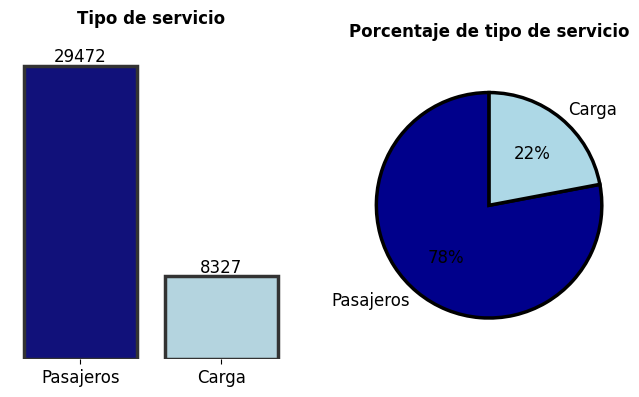

In [140]:
#plt.title('Tipo de buque',size='20',weight='bold')

#plt.pie(values,labels=index,autopct='%.0f%%')

#plt.show()


palette=['darkblue','lightblue']

fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(8,4))


sns.countplot(ax=ax[0],x=df['servicio'],palette=palette,linewidth=2.5, edgecolor=".2")
ax[0].set_title('Tipo de servicio',size=12,weight='bold',pad=20)
ax[0].spines[['right', 'top', 'left','bottom']].set_visible(False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(labelleft=False, left=False,labelsize=12)


for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=12);
    
    
    
plt.pie(values, labels = index, autopct='%.0f%%' ,colors=['darkblue','lightblue'],wedgeprops={"edgecolor":"0",'linewidth': 2.5,
                    'antialiased': True},startangle=90,textprops={'fontsize': 12})
ax[1].set_title('Porcentaje de tipo de servicio',size=12,weight='bold',pad=20);

<AxesSubplot: title={'center': 'Tipo de servicio por año'}, xlabel='servicio', ylabel='count'>

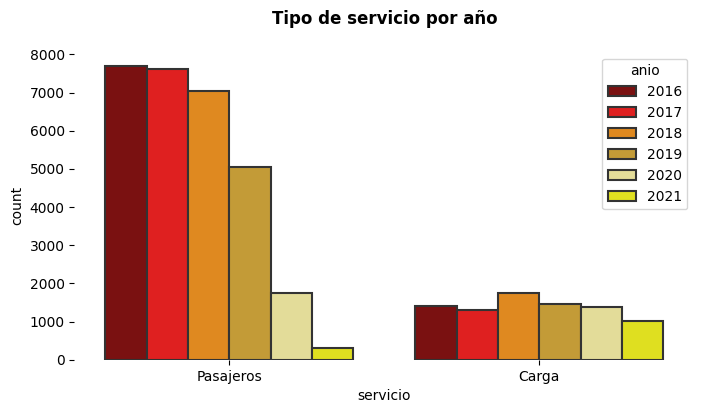

In [141]:
plt.rcParams['figure.figsize']= 8,4

palette=['darkred','red','darkorange','goldenrod','khaki','yellow']
#plt.rcParams['axes.spines.left'] = False
#plt.rcParams['axes.spines.right'] = False
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.bottom'] = False
plt.title("Tipo de servicio por año",size=12,weight='bold',pad=20)
sns.countplot(data=df,x='servicio',hue='anio',linewidth=1.5, edgecolor=".2",palette=palette)


In [142]:
#
#sns.countplot(data=carga, x='DIA_REGISTRO')
